In [1]:
import numpy as np
from benchmark_handler import BenchmarkHandler
import matplotlib.pyplot as plt

## 1. Define an optimizer as a class

The class should have a method called **observed_and_suggest** that receives two arguments:
1. A list of all possible the configurations. Each configuration is a dictionary with keys equal to its hyperparameters
2. A dictionary with the observed learning curves. Every key in the dictionary is the ID of the learningun curve and the ID corresponds to the index of the configuration in the first argument.

The method shold return:

1. The index of the configuration/learning curve to observe
2. The budget to observed

**Notes**: The method should not recommend budges higher than 99 or lower than 0.

In [2]:
class RandomSearch:

    def __init__(self, max_budget=99, verbose=False):
        self.max_budget = max_budget
        self.verbose = verbose

    def observe_and_suggest(self, configurations, observed_lc):

        if self.verbose:
            print("Observed Learning Curves:")
            print(observed_lc)
        
        min_budget = self.max_budget+1
        while min_budget == (self.max_budget+1): #we iterate till we find a curve that is not complete
            ix = np.random.randint(len(configurations))
            if ix in observed_lc.keys():
                min_budget = len(observed_lc[ix])
            else:
                min_budget = 0
            budget = np.random.randint(min_budget, self.max_budget)
        return ix, budget

##  2. Instatiate an optimizer object and a benchmark object

In [3]:
benchmark = BenchmarkHandler(data_path='',
                             environment = "Pong-v0",
                             search_space = "PPO",
                             return_names = ["returns_eval"],
                             seed = 0)


random_searcher = RandomSearch()

## 3. Run BO using the benchmark object

In [10]:
observed_lc, max_observed_perf, best_configuration, best_configuration_ix = benchmark.run_bo(optimizer=random_searcher,
                                                                        epochs = 10)  




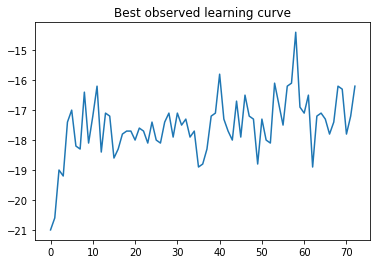

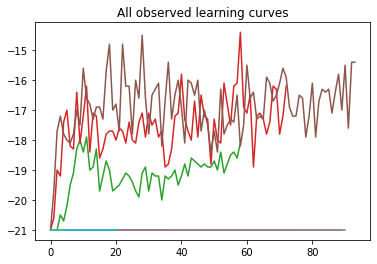

In [11]:
plt.plot(observed_lc[best_configuration_ix])
plt.title("Best observed learning curve")
plt.show()

for lc in observed_lc.values():
    plt.plot(lc)
plt.title("All observed learning curves")
plt.show()